# QBUS6830 Tutorial Lab 3: Multi-factor CAPM
## Data
Get the Kenneth French data on factors and 5 industry portfolios on a MONTHLY frequency from the files `F-F_Research Data Factors_m.txt` and `5_Industry Portfolios_m.txt`. Note that these data files contain both Monthly and Annual data.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import kurtosis
from datetime import datetime

In [18]:
# Import monthly data
dp = lambda x: datetime.strptime(x, '%Y%m')
skip_ff = np.concatenate([np.arange(3),  np.arange(1030, 1121)])
skip_ip = np.concatenate([np.arange(11),  np.arange(1038, 4489)])
data_ff = pd.read_csv('F-F_Research_Data_Factors_m.txt', skiprows=skip_ff, sep='\s+', date_parser=dp)
data_ip = pd.read_csv('5_Industry_Portfolios_m.txt', skiprows=skip_ip, sep='\s+', date_parser=dp)

In [19]:
data_ff

,Mkt-RF,SMB,HML,RF
1926-07-01,2.62,-2.16,-2.92,0.22
1926-08-01,2.56,-1.49,4.88,0.25
1926-09-01,0.36,-1.38,-0.01,0.23
1926-10-01,-3.43,0.04,0.71,0.32
1926-11-01,2.44,-0.24,-0.31,0.31
...,...,...,...,...
2011-08-01,-5.85,-3.24,-1.49,0.00
2011-09-01,-8.43,-3.58,-0.99,0.00
2011-10-01,11.53,3.53,-0.90,0.00
2011-11-01,-0.61,-0.22,-0.02,0.00


In [20]:
data_ip

,Cnsmr,Manuf,HiTec,Hlth,Other
1926-07-01,4.10,2.73,1.83,1.64,2.12
1926-08-01,2.58,2.26,2.41,4.51,4.36
1926-09-01,2.06,-0.39,1.06,0.61,0.29
1926-10-01,-4.65,-2.42,-2.26,-0.73,-2.85
1926-11-01,3.19,2.54,3.07,5.53,2.13
...,...,...,...,...,...
2011-08-01,-2.87,-6.76,-6.40,-3.31,-8.16
2011-09-01,-5.08,-9.99,-4.97,-4.07,-11.07
2011-10-01,9.37,13.66,10.79,5.54,13.61
2011-11-01,0.42,1.43,-1.44,1.47,-2.00


### Task 1
Plot each industry portfolio and the market index plus the HML and SMB factor returns over time. Find summary statistics for each of the return series. Comment and discuss.

Recall that an asset's excess return at time $t$ is simply $R_t - R_t^f$, where $R_t^f$ is the risk-free rate of return.

In [23]:
exr_ip = data_ip.sub(data_ff['RF'], axis=0)
exr = exr_ip.merge(data_ff.iloc[:,0:3], left_index=True, right_index=True)
exr

,Cnsmr,Manuf,HiTec,Hlth,Other,Mkt-RF,SMB,HML
1926-07-01,3.88,2.51,1.61,1.42,1.90,2.62,-2.16,-2.92
1926-08-01,2.33,2.01,2.16,4.26,4.11,2.56,-1.49,4.88
1926-09-01,1.83,-0.62,0.83,0.38,0.06,0.36,-1.38,-0.01
1926-10-01,-4.97,-2.74,-2.58,-1.05,-3.17,-3.43,0.04,0.71
1926-11-01,2.88,2.23,2.76,5.22,1.82,2.44,-0.24,-0.31
...,...,...,...,...,...,...,...,...
2011-08-01,-2.87,-6.76,-6.40,-3.31,-8.16,-5.85,-3.24,-1.49
2011-09-01,-5.08,-9.99,-4.97,-4.07,-11.07,-8.43,-3.58,-0.99
2011-10-01,9.37,13.66,10.79,5.54,13.61,11.53,3.53,-0.90
2011-11-01,0.42,1.43,-1.44,1.47,-2.00,-0.61,-0.22,-0.02


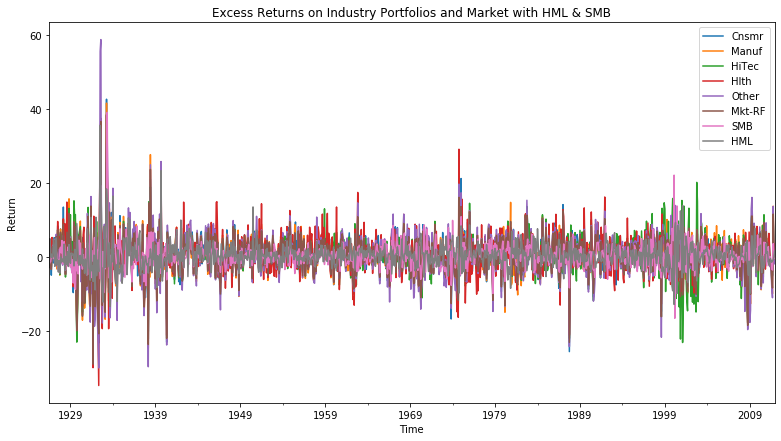

In [24]:
exr.plot(figsize=(13, 7))
plt.xlabel('Time')
plt.ylabel('Return')
plt.title('Excess Returns on Industry Portfolios and Market with HML & SMB')
plt.legend()
plt.show()

In [25]:
exr.head()

,Cnsmr,Manuf,HiTec,Hlth,Other,Mkt-RF,SMB,HML
1926-07-01,3.88,2.51,1.61,1.42,1.90,2.62,-2.16,-2.92
1926-08-01,2.33,2.01,2.16,4.26,4.11,2.56,-1.49,4.88
1926-09-01,1.83,-0.62,0.83,0.38,0.06,0.36,-1.38,-0.01
1926-10-01,-4.97,-2.74,-2.58,-1.05,-3.17,-3.43,0.04,0.71
1926-11-01,2.88,2.23,2.76,5.22,1.82,2.44,-0.24,-0.31


In [26]:
exr_2 = exr.iloc[:,6:]
exr_2.head()

,SMB,HML
1926-07-01,-2.16,-2.92
1926-08-01,-1.49,4.88
1926-09-01,-1.38,-0.01
1926-10-01,0.04,0.71
1926-11-01,-0.24,-0.31


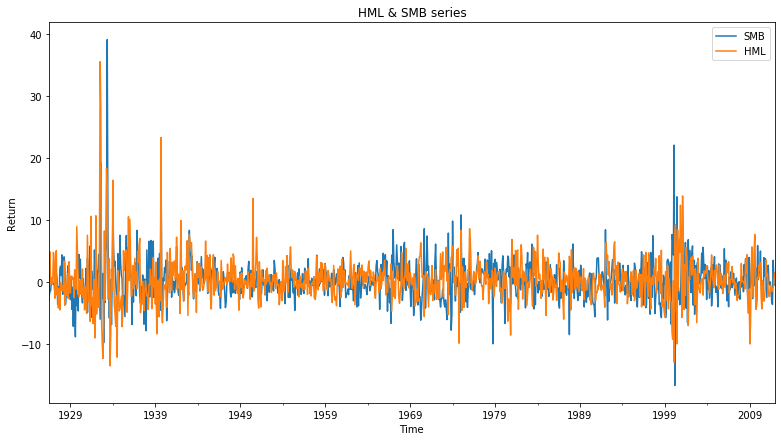

In [27]:
exr_2.plot(figsize=(13, 7))
plt.xlabel('Time')
plt.ylabel('Return')
plt.title('HML & SMB series')
plt.legend()
plt.show()

In [9]:
descriptive = exr.describe()
descriptive.loc['skew', :] = exr.skew()
descriptive.loc['kurt', :] = kurtosis(exr, fisher=False)
descriptive.round(4)

,Cnsmr,Manuf,HiTec,Hlth,Other,Mkt-RF,SMB,HML
count,1026.0000,1026.0000,1026.0000,1026.0000,1026.0000,1026.0000,1026.0000,1026.0000
mean,0.6940,0.6820,0.6257,0.7735,0.5860,0.6175,0.2415,0.3822
std,5.3856,5.5966,5.6908,5.7350,6.5587,5.4572,3.3151,3.5674
min,-28.2000,-29.8400,-26.7700,-34.8000,-30.0500,-29.0400,-16.6200,-13.4500
25%,-2.1075,-2.1225,-2.1800,-2.2800,-2.4800,-2.1775,-1.5100,-1.3075
50%,0.9100,0.9100,0.8900,0.7350,0.9350,0.9550,0.0600,0.2250
75%,3.5775,3.6250,3.7200,3.7975,3.9325,3.6750,1.8125,1.7775
max,42.5900,41.5300,33.8000,38.5600,58.7100,38.2700,39.0400,35.4800
skew,0.1155,0.3584,-0.1698,0.1800,0.8942,0.1688,2.1813,1.8355
kurt,10.1566,11.0530,6.5058,10.1047,15.8557,10.3983,25.1477,18.5977


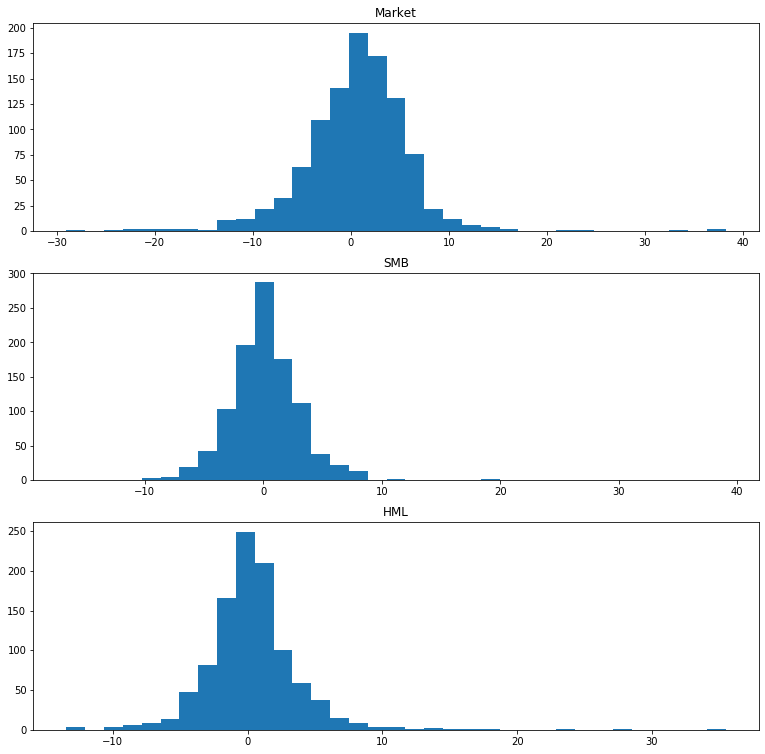

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(13, 13))
ax[0].hist(exr['Mkt-RF'], 35)
ax[0].set_title('Market')
ax[1].hist(exr['SMB'], 35)
ax[1].set_title('SMB')
ax[2].hist(exr['HML'], 35)
ax[2].set_title('HML')
plt.show()

# Answer guide #

All return series seem mean stationary around a mean return close to, but just above 0%; mean monthly returns in each series are between 0.24-0.77%, the medians are slightly higher. The industry and market returns have standard deviations between 5-6%, while HMB, SML are smaller at \approx 3.5%. SMB and HML visually have smaller variation than the other series, in most time periods, but still exhibit higher volatility around the years 1930 and 2000. 

All series have positive excess kurtosis (i.e. kurtosis > 3), indicating each is peaked in the middle and has fat tails, as shown by the histograms. Each series has a smaller number of returns that are extreme and sepearated from the rst: i.e. potential outlying rturns. All series, except HiTec, are positively skewed; HMB and SML are much more strongly skewed than the other series: this seems mainly due to these 2 series having only positive extreme returns.

Almost all series had monthly returns ranging between -30% and 30-40%, though again Other had a large outlying return of nearly 60% in one month.

### Task 2
Form the excess returns on each industry portfolio and the excess returns on the market. Construct a scatterplot of each excess industry return against the HML and SMB series respectively. Calculate the pairwise correlations between each industry and the HML and SMB series respectively. Test whether each is different to 0 (or not) at the 5% level.

In [28]:
exr.head()

,Cnsmr,Manuf,HiTec,Hlth,Other,Mkt-RF,SMB,HML
1926-07-01,3.88,2.51,1.61,1.42,1.90,2.62,-2.16,-2.92
1926-08-01,2.33,2.01,2.16,4.26,4.11,2.56,-1.49,4.88
1926-09-01,1.83,-0.62,0.83,0.38,0.06,0.36,-1.38,-0.01
1926-10-01,-4.97,-2.74,-2.58,-1.05,-3.17,-3.43,0.04,0.71
1926-11-01,2.88,2.23,2.76,5.22,1.82,2.44,-0.24,-0.31


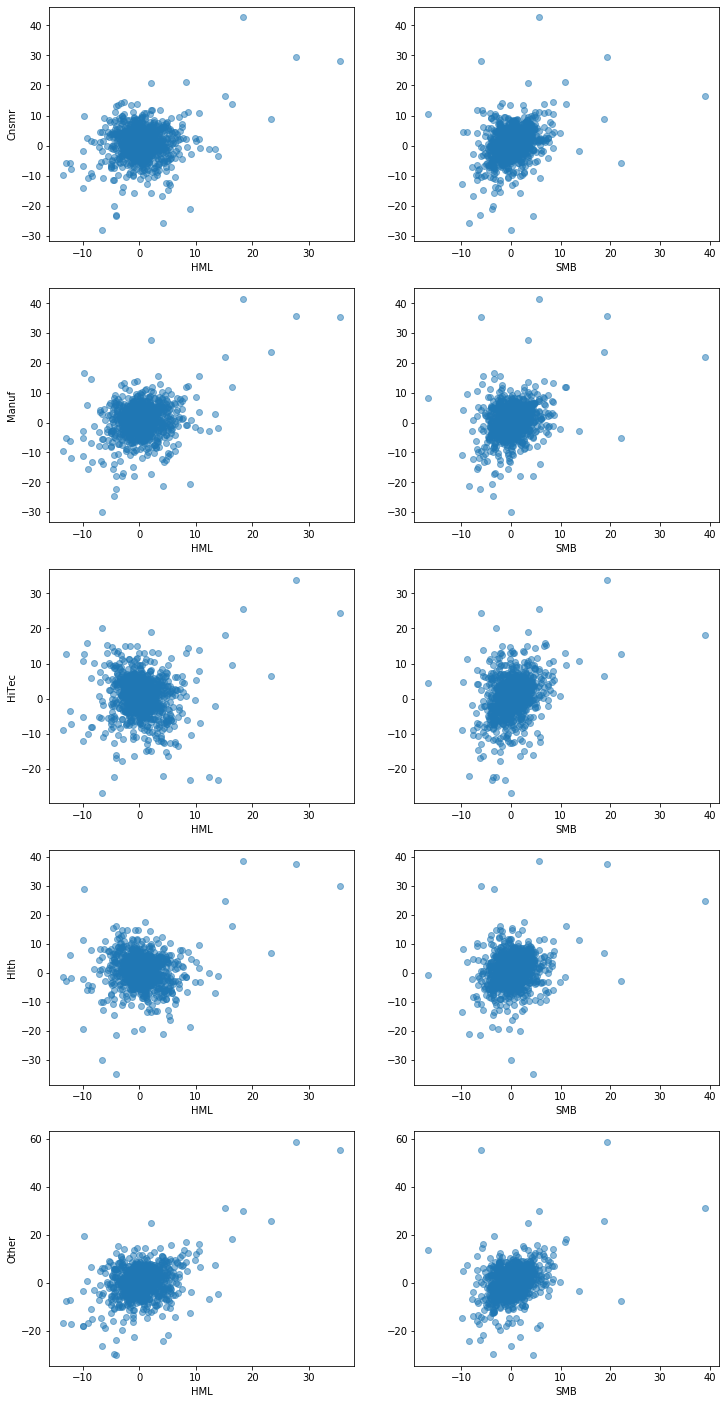

In [11]:
fig, ax = plt.subplots(5, 2, figsize=(12, 25))
for i in range(5):
    ax[i, 0].scatter(exr['HML'], exr.iloc[:, i], alpha=0.5)
    ax[i, 0].set_xlabel('HML')
    ax[i, 0].set_ylabel(exr.columns[i])
    
    ax[i, 1].scatter(exr['SMB'], exr.iloc[:, i], alpha=0.5)
    ax[i, 1].set_xlabel('SMB')
    
plt.show()

In [29]:
exr.head()

,Cnsmr,Manuf,HiTec,Hlth,Other,Mkt-RF,SMB,HML
1926-07-01,3.88,2.51,1.61,1.42,1.90,2.62,-2.16,-2.92
1926-08-01,2.33,2.01,2.16,4.26,4.11,2.56,-1.49,4.88
1926-09-01,1.83,-0.62,0.83,0.38,0.06,0.36,-1.38,-0.01
1926-10-01,-4.97,-2.74,-2.58,-1.05,-3.17,-3.43,0.04,0.71
1926-11-01,2.88,2.23,2.76,5.22,1.82,2.44,-0.24,-0.31


In [33]:
stats.pearsonr(exr.loc[:, 'HiTec'], exr['HML'])

(0.012514087416023098, 0.6888849599587928)

In [12]:
c_smb = np.empty(5)
p_smb = np.empty(5)
c_hml = np.empty(5)
p_hml = np.empty(5)
for i in range(5):
    (c_smb[i], p_smb[i]) = stats.pearsonr(exr.iloc[:, i], exr['SMB'])
    (c_hml[i], p_hml[i]) = stats.pearsonr(exr.iloc[:, i], exr['HML'])
    #print (c_smb[i], p_smb[i], c_hml[i], p_hml[i])

tbl_corr = pd.DataFrame({
    'SMB Correlation': c_smb.round(4),
    'SMB p-value': p_smb.round(4),
    'HML Correlation': c_hml.round(4),
    'HML p-value': p_hml.round(4)})
tbl_corr.index = exr.columns[:5]
tbl_corr

,SMB Correlation,SMB p-value,HML Correlation,HML p-value
Cnsmr,0.3160,0.0,0.2088,0.0000
Manuf,0.2697,0.0,0.3130,0.0000
HiTec,0.3142,0.0,0.0125,0.6889
Hlth,0.2139,0.0,0.0697,0.0257
Other,0.3438,0.0,0.4041,0.0000


# Answer guide #
The scatterplots above show the marginal or unconditional relationships between each industry return series and HML (left) and SMB (right). These relationships all seem to be pretty weak and it seems unclear whether they are positive or negative in general. Actually they almost look like residual plots! However, one thing apparent is that generally the small number of very high monthly HML and/or SMB returns are associated with the small number of high industry group portfolio returns; see the right hand top corner of each plot. However, since this does not seem to hold for low HML or SMB returns, where associated industry returns seem close to average, the marginal relationships here may be NONLINEAR. Regarding outliers, all scatterplots show quite a few return pairs to be concerned about. More on this below.
 
As the relationships above may not be close to linear, correlations may not make sense here. But let's assess them anyway.

All correlations with the HML and SMB returns are weakly positive, though HiTech is lowest at 0.0125 with HML. Most p-values are 0, indicating strong rejection of the null hypothesis (of zero correlation) and that most of these correlations are highly significantly different to, and greater than 0. One exception is HiTech with HML, with a p-val of 0.69: HiTech correlation with HML is not significantly different to 0. Health’s correlation with HML is significantly different to 0 at a 5% (but not at 1%) significance level.  

These results are potentially strongly influenced by the small groups of extreme returns, especially in the top right corner, in each scatterplot above. These results should thus be taken "with a grain of salt" at the moment.

### Task 3
Fit a multi-factor CAPM to each excess industry return series, using all three factors supplied, and report the estimates as well as 95% intervals for each estimate. Briefly comment and assess whether each industry could be classed as high, medium or low market risk. Provide a test or interval to support your conclusions.

Recall that the multi-factor CAPM follows 
$$y_t = \alpha + \beta_1 x_{1, t} + \beta_2 x_{2, t} + \beta_3 x_{3, t} + \epsilon_t$$
where $y_t = R_t - R_t^f$, $x_{1, t} = R_t^m - R_t^f$, $x_{2, t} = \mathrm{SMB}_t$, and $x_{3, t} = \mathrm{HML}_t$.

In [34]:
exr.head()

,Cnsmr,Manuf,HiTec,Hlth,Other,Mkt-RF,SMB,HML
1926-07-01,3.88,2.51,1.61,1.42,1.90,2.62,-2.16,-2.92
1926-08-01,2.33,2.01,2.16,4.26,4.11,2.56,-1.49,4.88
1926-09-01,1.83,-0.62,0.83,0.38,0.06,0.36,-1.38,-0.01
1926-10-01,-4.97,-2.74,-2.58,-1.05,-3.17,-3.43,0.04,0.71
1926-11-01,2.88,2.23,2.76,5.22,1.82,2.44,-0.24,-0.31


In [39]:
X = exr.iloc[:,5:]
X = sm.add_constant(X)

Y = exr.loc[:, 'Cnsmr']

model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Cnsmr   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     2376.
Date:                Fri, 27 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:36:02   Log-Likelihood:                -2117.8
No. Observations:                1026   AIC:                             4244.
Df Residuals:                    1022   BIC:                             4263.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1244      0.060      2.064      0.0

In [14]:
X = exr.iloc[:,5:8]
X = sm.add_constant(X)
res = np.empty(5, dtype=object)
a = np.empty(5)
b1 = np.empty(5)
b2 = np.empty(5)
b3 = np.empty(5)
ci_a = np.empty(5, dtype=object)
ci_b1 = np.empty(5, dtype=object)
ci_b2 = np.empty(5, dtype=object)
ci_b3 = np.empty(5, dtype=object)
for i in range(5):
    res[i] = sm.OLS(exr.iloc[:, i], X).fit()
    a[i] = res[i].params[0].round(3)
    b1[i] = res[i].params[1].round(3)
    b2[i] = res[i].params[2].round(3)
    b3[i] = res[i].params[3].round(3)
    ci = res[i].conf_int(alpha=0.05)
    ci_a[i] = '({:.3f}, {:.3f})'.format(ci.iloc[0, 0], ci.iloc[0, 1])
    ci_b1[i] = '({:.3f}, {:.3f})'.format(ci.iloc[1, 0], ci.iloc[1, 1])
    ci_b2[i] = '({:.3f}, {:.3f})'.format(ci.iloc[2, 0], ci.iloc[2, 1])
    ci_b3[i] = '({:.3f}, {:.3f})'.format(ci.iloc[3, 0], ci.iloc[3, 1])
tbl_coef = pd.DataFrame(data={'alpha': a, 'CI_alpha': ci_a, 'b1 (Mkt)': b1, 'CI_beta 1': ci_b1,
                             'b2 (SMB)': b2, 'CI_beta 2': ci_b2, 'b3 (HML)': b3, 'CI_beta 3': ci_b3}) 
tbl_coef.index = exr.columns[:5]
tbl_coef

,alpha,CI_alpha,b1 (Mkt),CI_beta 1,b2 (SMB),CI_beta 2,b3 (HML),CI_beta 3
Cnsmr,0.124,"(0.006, 0.243)",0.921,"(0.898, 0.944)",0.012,"(-0.025, 0.050)",-0.006,"(-0.039, 0.028)"
Manuf,0.038,"(-0.049, 0.126)",0.981,"(0.964, 0.999)",-0.096,"(-0.124, -0.068)",0.159,"(0.134, 0.184)"
HiTec,0.132,"(0.001, 0.263)",0.987,"(0.961, 1.013)",0.037,"(-0.005, 0.078)",-0.326,"(-0.363, -0.289)"
Hlth,0.318,"(0.111, 0.525)",0.892,"(0.851, 0.932)",-0.095,"(-0.161, -0.030)",-0.189,"(-0.248, -0.130)"
Other,-0.223,"(-0.343, -0.103)",1.055,"(1.031, 1.078)",0.066,"(0.028, 0.104)",0.371,"(0.336, 0.405)"


In [16]:
# Model coefficients 
res_cnsmr = sm.OLS(exr.iloc[:, 0], X).fit()
res_cnsmr.params.round(3)

const     0.124
Mkt-RF    0.921
SMB       0.012
HML      -0.006
dtype: float64

In [17]:
# Confidence interval 
res_cnsmr.conf_int(alpha=0.05)

,0,1
const,0.006122,0.242608
Mkt-RF,0.898028,0.944499
SMB,-0.025077,0.049792
HML,-0.039495,0.027922


# Answer guide #
Three of the model alphas, for Consumer, HiTech and Health are significantly positive, though practially small at $< 0.15$%; Manfuacturing's alpha is not significantly different to 0 and Other's alpha is significantly less than 0, though again practially small at $-0.2$%. No earth shattering news there.  

All market betas are positive and reasonably close to 1, the minimum is Health which has estimated market beta of 0.82. Consumer, Manufacturing and Health all have betas significantly lower than 1 at the 5% level (their CIs are all below 1); indicating these are low risk portfolios, compared to the market. Other has a market beta significantly greater than 1 (CI all above 1), indicating it is a high risk portfolio compared to market. Finally HiTec’s beta is not significantly different to 1 (CI includes 1), indicating it is of moderate risk and has a similar risk level to the market portfolio.

The effect of SMB is statistically insignificant on Consumer and HiTec, but is significantly negative on Health and significantly positive on the Other sector returns. The effect of HML is statistically insignificant on Consumer sector, but is significantly negative on HiTec and Health sectors and significantly positive on the Manufacturing and Other sector returns. 


### Task 4
Discuss whether the assumptions made in these analyses might be valid or not. In particular, are outliers an issue or problem in any of these data sets?


Note that the assumptions of OLS regression are:

1. The population residuals and the $x_{i,t}$ variables are uncorrelated. In other words, $E(\epsilon_t | x_{i,t}) = 0$.
2. The data sample vectors (for each time $t$) are IID, over time.
3. The 4th moments of both $y_t$ and each $x_{i,t}$ are finite, i.e., $E(x_{i,t}^4) < \infty$, $E(y_t^4) < \infty$. This
implies that the mean and variance of each of Y and each X are also finite.
4. The $x_{i,t}$ variables, if there are more than 1, are not perfectly correlated with each other, and none is a perfect linear combination of any of the others, i.e., there is no perfect multicollinearity.

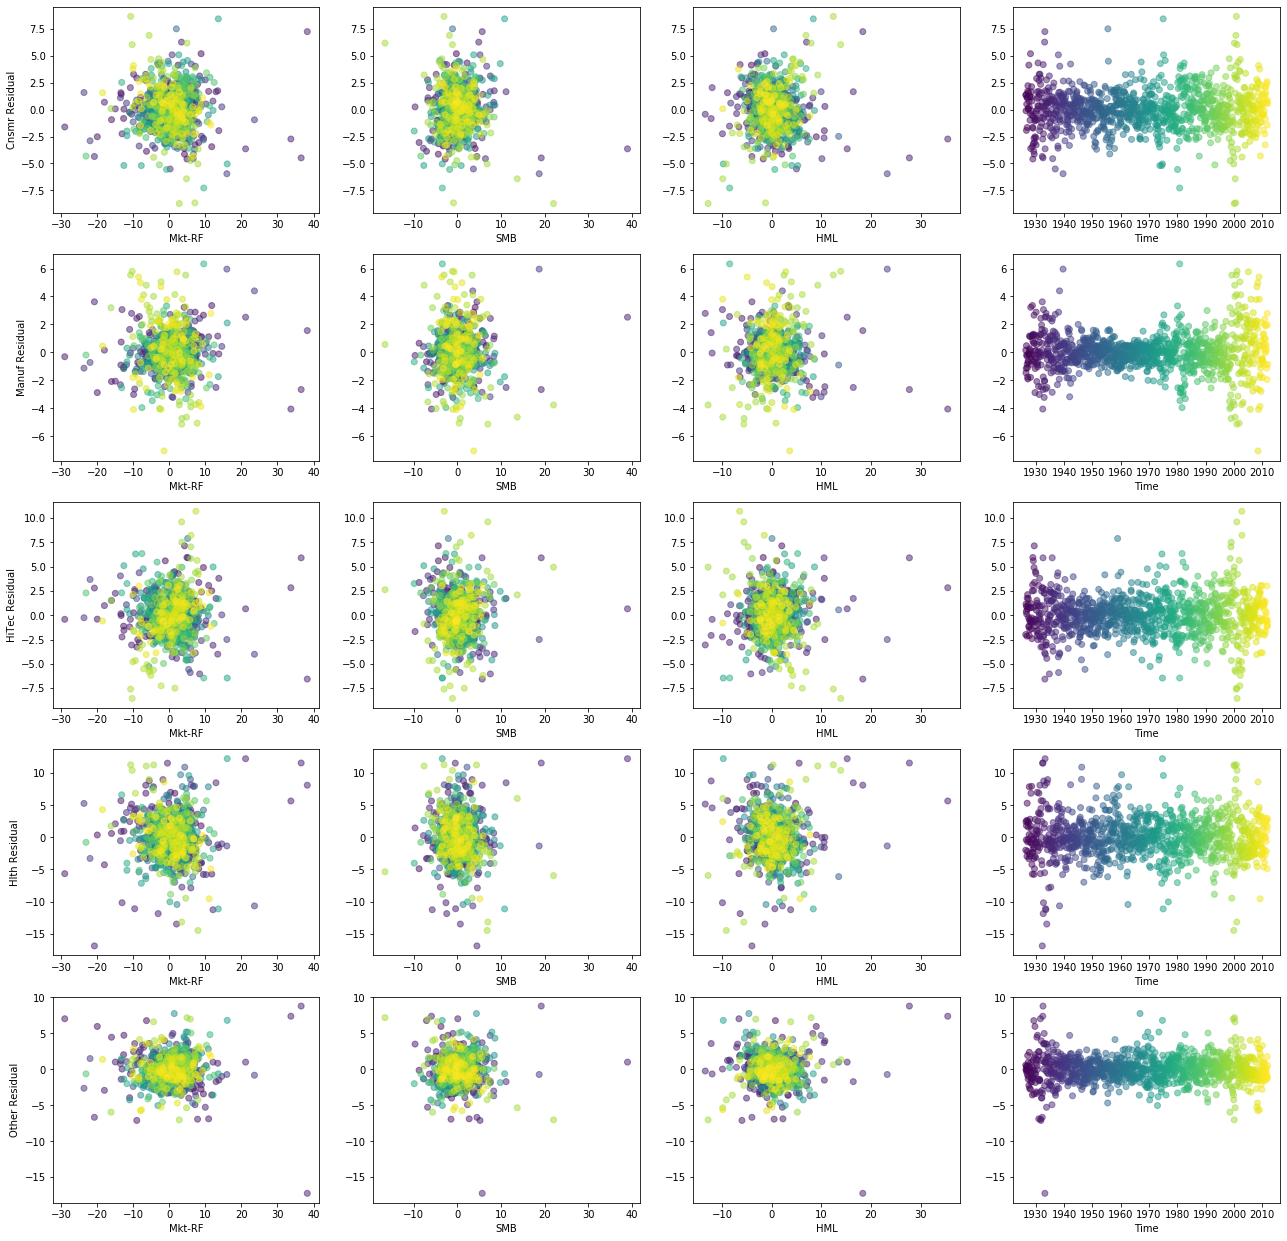

In [18]:
T = len(exr)
fig, ax = plt.subplots(5, 4, figsize=(22, 22))
for i in range(5):
    e = res[i].resid
    ax[i, 0].scatter(exr['Mkt-RF'], e, c=range(T), alpha=0.5)
    ax[i, 0].set_xlabel('Mkt-RF')
    ax[i, 0].set_ylabel('{} Residual'.format(exr.columns[i]))
    ax[i, 1].scatter(exr['SMB'], e, c=range(T), alpha=0.5)
    ax[i, 1].set_xlabel('SMB')
    ax[i, 2].scatter(exr['HML'], e, c=range(T), alpha=0.5)
    ax[i, 2].set_xlabel('HML')
    ax[i, 3].scatter(e.index, e, c=range(T), alpha=0.5)
    ax[i, 3].set_xlabel('Time')
plt.show()

# Answer guide #
A1: Errors and each explanatory (X) variable are uncorrelated. 
For assumption 1 to be satisfied, any omitted variable not contained in the model, but that influences the excess returns in the industry varuable $y$ should not be correlated with the excess market return, nor the HML, SMB variables in the regression model: e.g. industry-specific news or events that did not affect the market overall and did not affect the HML and SMB factors. The assumption is not satisfied if e.g. a variable (like general macro-economic news) affects the industry portfolio return and affects either the market return, HML or SMB. Because there are so many economic and financial variables that can influence stock returns for a range of industries concurrently this assumption is unlikely to hold perfectly in practice. Each industry should be assessed separately here. We can only hope that the influences of omitted variables are not too large.
 
If assumption 1 is not satisfied, then the estimates of the slope coefficients will be biased, as will their t-statistics (same direction) and hence the p-value and conclusions of the tests could be incorrect. 

Residual plots can be used to informally assess this: there should be no patterns for the residuals when plot against any of: fitted values, any of the X variables.  

A2: data are an iid sample. 
The second assumption, the data sample being iid, requires that there is no autocorrelation in both the dependent variables, i.e. the industry excess returns, as well the explanatory variables, i.e. the excess market returns, HML and SMB. While many financial models assume such correlation does not exist in asset and portfolio returns, we have seen that often a weak level of correlation can be estimated. Without prior knowledge, it could probably be thought quite likely that financial factors such as SMB and HML, could well be autocorrelated. Later in this unit we will be able to test for this.

A3 Outliers are rare, i.e. fourth moments are finite.
An informal way to assess this is via residual plots. A red flag in this case are observations in the corners of the residual plot that seem to be outliers for both the X variable and the residual. Outliers in X and $y$ have been assessed above. 

A4: no multi-collinearity. If A4 was not satisfied, then the regression model could not be fit to the data. Since Python fit the models successfully above, A4 is satisfied.

*Consumer*

For A1, there are no obvious patterns in any of the residual plots. The average residual seems to be $\approx 0$ for each value of the market excess return and also for HML and SMB. This suggests the model is a good fit, but IT DOES NOT PROVE THAT ASSUMPTION 1 IS SATISFIED, though it does at least suggest that it MAY be satisfied. Assumption 1 is about population errors, not estimated residuals: omitted variable bias would also bias the residuals away from the population errors. Thus, unless we can identify some clear omitted variables, A1 seems OK here. 

Can you think of any ommitted variables that could be related to Consumer returns and correlated with Markekt, HML or SMB?

We leave A2 for later, when we can test for auto-correlation. 

Re A3 outliers in the returns, the market returns, the HML and SMB variables are the only concerns here. These could have a large influence on the estimated regression line. Re the residual plots, there is 1 residual that is close to the top RH corner of the residuals vs market return plot. However, since this is not even the largest residual in magnitude, it is not really an outlier. I thus have no concerns here re outliers in the residuals, since none of the points seem very clearly too separated from the rest of the data. However, the outliers in the returns, the market returns, the HML and SMB variables may mean A3 is not satisfied.  


*Manufacturing*

Comments as above apply. Good fitting model, no real concerns re outliers or extreme residuals. However, the outliers in the returns, the market returns, the HML and SMB variables may mean A3 is not satisfied.

Can you think of any ommitted variables that could be related to Manufacturing returns and correlated with Markekt, HML or SMB?


*HiTech*

Here’s where adding the factors HML and SMB really seems to have paid off in terms of model fit. The single factor CAPM model was rejected (by me) last week for this data, since there were too many negative residuals for high market returns. However, this is not the case for the multi-factor model. Now, there are no obvious patterns in any of the residual plots. This is the better model that I called for last week!
So, this seems to be a good fitting model, with no clear residual patterns and no residual outlier problems. However, the outliers in the returns, the market returns, the HML and SMB variables may mean A3 is not satisfied.

Can you think of any ommitted variables that could be related to HiTech returns and correlated with Markekt, HML or SMB?

*Health*

Similar comments to those for Consumer, Manufacturing apply. The model seems to fit the data well. No real concerns about outliers or ill-fitting areas. Three positive residuals for the three highest market returns is a slight concern, but not too unlikely even if the model fits well. However, the outliers in the returns, the market returns, the HML and SMB variables may mean A3 is not satisfied.

Can you think of any ommitted variables that could be related to Health returns and correlated with Market, HML or SMB?

*Other*

This was another dataset I was also concerned about last week. However, once again the model seems to fit reasonably well for all types of market returns: the line goes nicely through the centre and the residuals average 0 at all points on the market return x-axis. 

However, the concern that has again been upheld, and not completely corrected by the 3 factor model here, concerns the three outliers occurring at very high market excess returns (see plot on left). These three points are the three furthest from the CAPM line and have the three largest residual values in magnitude and they are in the far corners of the residual vs market plot. Now, the two high positive ones that were of most concern for the CAPM, seem to be better explained by the 3 factor model: the residual plot on the right shows these are now not massively extreme outliers anymore, since several other residuals are about the same magnitude as these two. However, the negative outlier here is now the big concern. It is more than double the magnitude of the next highest in magnitude of the negative residuals. This suggests the possibility of an (error) distribution that may not have finite 4th moment or even finite variance.  

If assumption 3 does not hold, then the central limit theorem will be violated so that the confidence intervals and p-values for the parameters are not accurate. Further, the estimates of the standard errors of the parameter estimates will also not be accurate and will not tend to their true values in large samples, making the t-statistics inaccurate too. 

For this last dataset, I would not trust the result of the CAPM or the 3 factor model analysis regarding inference and confidence intervals for each parameter. A robust method may give much more accurate and useful results in this case (as it may in all cases, since market returns, HML and SMB have outliers that affect the model for each sector). However, methods that are robust to outliers are beyond the scope of this unit (but you might cover some in other BA units). 

### Task 5
Report on how well and how strongly the Multi-factor CAPM fits each industry portfolio data set. Compare results to the single factor CAPMs from lab 2.

In [19]:
#Refit a single factor CAPM
X_sin = sm.add_constant(exr['Mkt-RF'])
res_sin = np.empty(5, dtype=object)
r2_mul = np.zeros(5)
ser_mul = np.zeros(5)
r2_sin = np.zeros(5)
ser_sin = np.zeros(5)
for i in range(5):
    res_sin[i] = sm.OLS(exr.iloc[:, i], X_sin).fit()
    r2_mul[i] = res[i].rsquared.round(3)
    ser_mul[i] = np.sqrt(res[i].mse_resid).round(3)
    r2_sin[i] = res_sin[i].rsquared.round(3)
    ser_sin[i] = np.sqrt(res_sin[i].mse_resid).round(3)
tbl_fit = pd.DataFrame(data={'R Squared multi': r2_mul, 'SER multi': ser_mul,
                            'R Squared single': r2_sin, 'SER single': ser_sin}) 
tbl_fit.index = exr.columns[:5]
tbl_fit

,R Squared multi,SER multi,R Squared single,SER single
Cnsmr,0.875,1.910,0.875,1.909
Manuf,0.936,1.415,0.924,1.544
HiTec,0.862,2.113,0.823,2.398
Hlth,0.662,3.340,0.646,3.415
Other,0.913,1.934,0.873,2.334


# Answer guide #
The residual plots above show that the residuals can be very high and very low, e.g. up to -15% or 15%: enormous errors to make in a prediction of investment returns, even on a monthly frequency! This is reflected in SER, showing typical errors in prediction range from 1.42% (Manuf) to 3.34% (Health). I would consider these relatively large typical errors to make, even for monthly data (especially those above 2%). However, they are all slightly smaller than the SER from the single factor CAPM model, except for the Consumer portfolio.

Again, when compared to the original standard deviations (around 5 or 6%) without accounting for market return effect, the error standard deviations (SER) have reduced by between 66% (Health) and 92% (Manuf) (i.e. these are R-squared values). This illustrates that the three factor CAPM is a great improvement over just predicting industry group returns with their sample mean alone. However, the improvements over the CAPM model in most sectors are small and minor, the highest being 4% for Other.

When comparing two regression models, adjusted R-squared is more sensible to use. For all portfolios except Consumer, the adjusted R-squared is the same as the R-squared, to 2 decimal places (because of the large sample size). 

So it seems these three factor CAPM models are strong fits to the data after all, but only slightly or marginally better fits than the single factor CAPM. Though for HiTect sector the 3 factor model has improved the most over the single factor CAPM. 

### Task 6
Are there any changes in conclusions from using daily data,as in lecture,to monthly data? Any changes from conclusions in lab 2? Other issues?

# Rolling Linear Regression

So what might be wrong with the above analysis?

Well, this is really just a point estimate. So it is simply the market/SMB/HML exposure at one snapshot in time, and that these coefficients (i.e. the market risk or SMB risk or HML risk) can change over time.

In [20]:
tbl_coef

,alpha,CI_alpha,b1 (Mkt),CI_beta 1,b2 (SMB),CI_beta 2,b3 (HML),CI_beta 3
Cnsmr,0.124,"(0.006, 0.243)",0.921,"(0.898, 0.944)",0.012,"(-0.025, 0.050)",-0.006,"(-0.039, 0.028)"
Manuf,0.038,"(-0.049, 0.126)",0.981,"(0.964, 0.999)",-0.096,"(-0.124, -0.068)",0.159,"(0.134, 0.184)"
HiTec,0.132,"(0.001, 0.263)",0.987,"(0.961, 1.013)",0.037,"(-0.005, 0.078)",-0.326,"(-0.363, -0.289)"
Hlth,0.318,"(0.111, 0.525)",0.892,"(0.851, 0.932)",-0.095,"(-0.161, -0.030)",-0.189,"(-0.248, -0.130)"
Other,-0.223,"(-0.343, -0.103)",1.055,"(1.031, 1.078)",0.066,"(0.028, 0.104)",0.371,"(0.336, 0.405)"


So instead we can look at a rolling regression. Here, instead of performing a regression with all the datapoints, we instead do:

    1. Perform regression on Day 1 - Day 200 -> Get the market risk
    2. Perform regression on Day 2 - Day 201 -> Get the market risk
    3. Perform regression on Day 3 - Day 202 -> Get the market risk
    4. etc.
    
Here, instead of getting the coefficients at one point in time, we instead look at how the coefficients change in time. 

Now, for the market risk in the above table to be trustworthy we should expect the results from the rolling regression should be about the same. 

In [ ]:
# Kalman filter

In [21]:
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

In [22]:
sector = 'Hlth'

X = sm.add_constant(exr[['Mkt-RF', 'SMB', 'HML']])
Y = exr[sector]

# 253 is the number of trading days in a year
model = RollingOLS(Y, X, window=253).fit()

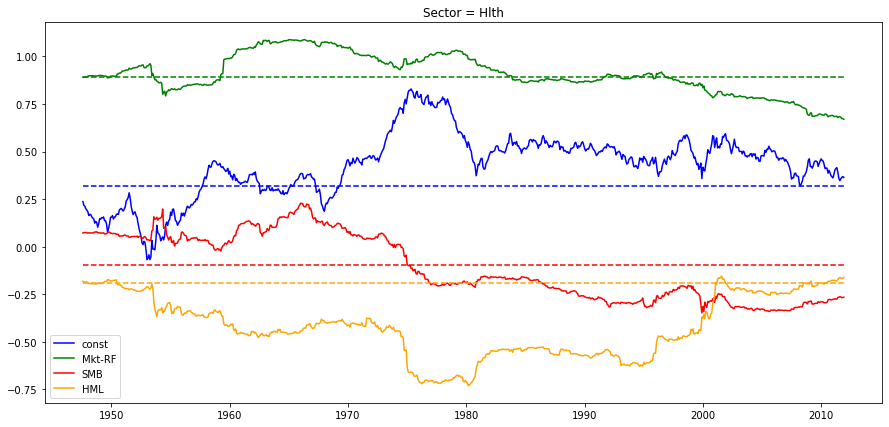

In [26]:
# Just ignore this code
original_coefficinets = tbl_coef.loc[sector, ['alpha', 'b1 (Mkt)', 'b2 (SMB)', 'b3 (HML)']].values

coeff_df = pd.DataFrame(1, index=model.params.index, 
                        columns=['const', 'Mkt-RF', 'SMB', 'HML']) * original_coefficinets

fig, ax = plt.subplots(1, 1, figsize=(15, 7))

colors = ['blue', 'green', 'red', 'orange']
predictors = ['const', 'Mkt-RF', 'SMB', 'HML']

for i, color in enumerate(colors):
    plt.plot(model.params.iloc[253:, i], color=color, label=predictors[i])
    plt.plot(coeff_df.iloc[253:, i], '--', color=color)

plt.title(f"Sector = {sector}")
plt.legend();

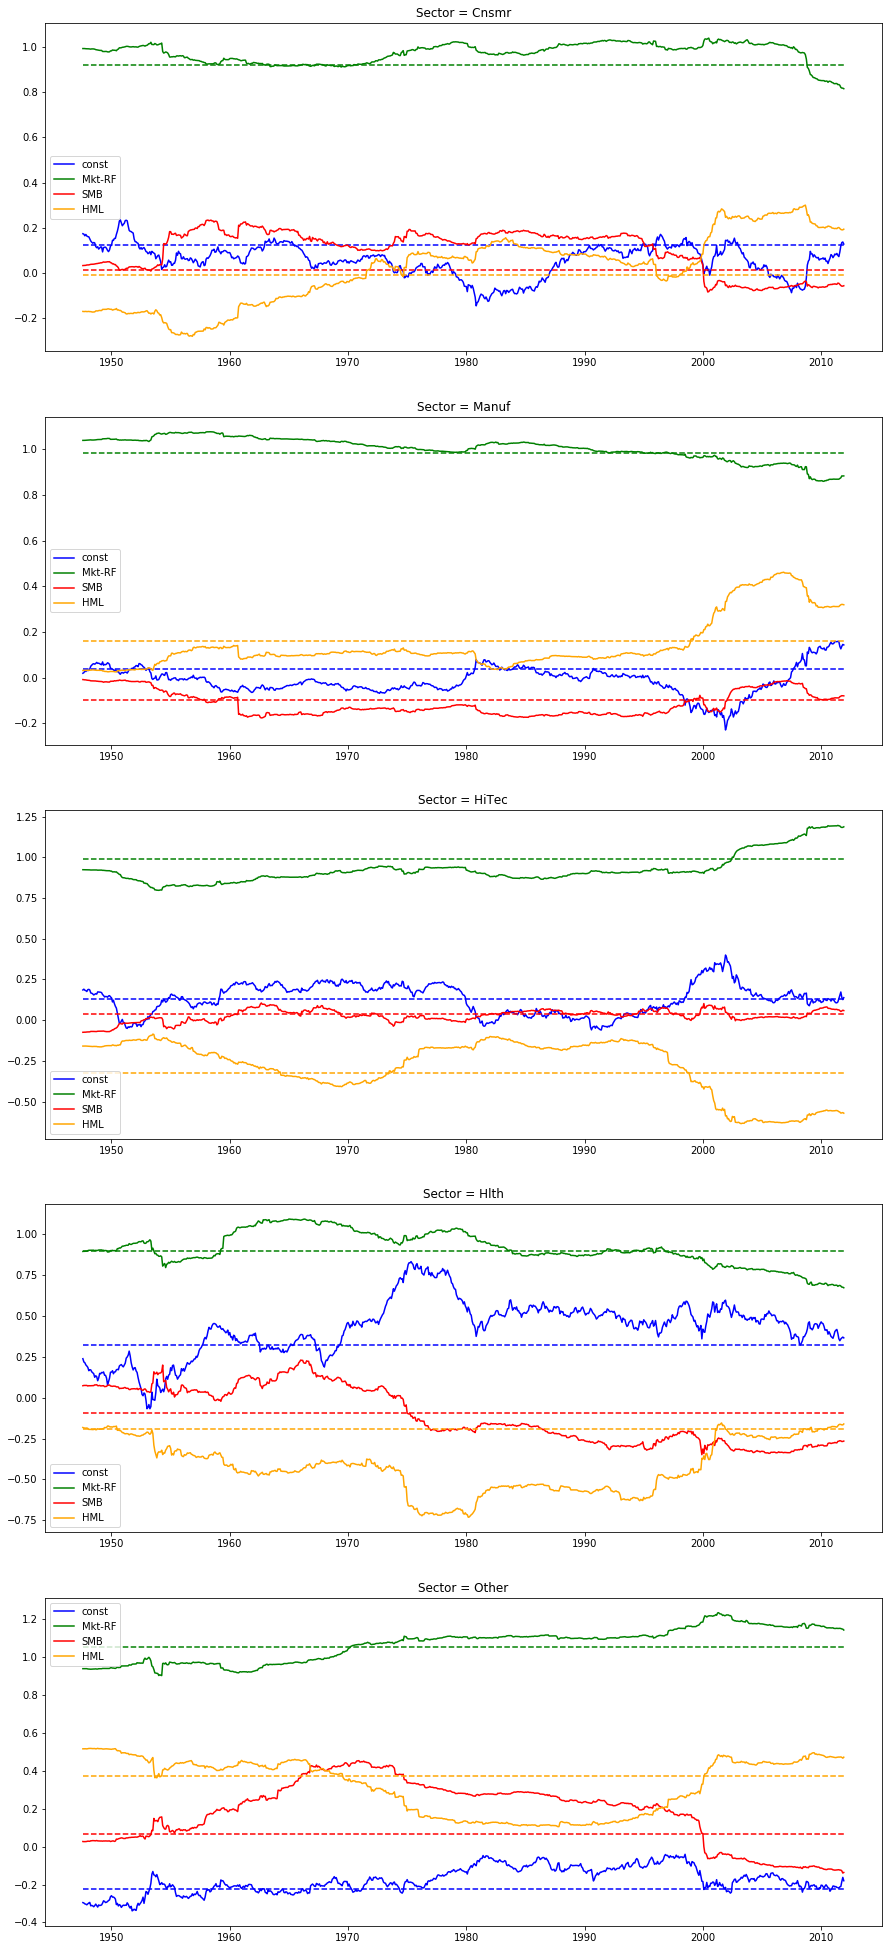

In [38]:
plt.figure(figsize=(15, 35))
for k, sector in enumerate(['Cnsmr', 'Manuf', 'HiTec', 'Hlth', 'Other']):
    X = sm.add_constant(exr[['Mkt-RF', 'SMB', 'HML']])
    Y = exr[sector]

    # 253 is the number of trading days in a year
    model = RollingOLS(Y, X, window=253).fit()
    
    original_coefficinets = tbl_coef.loc[sector, ['alpha', 'b1 (Mkt)', 'b2 (SMB)', 'b3 (HML)']].values
    coeff_df = pd.DataFrame(1, index=model.params.index, 
                            columns=['const', 'Mkt-RF', 'SMB', 'HML']) * original_coefficinets

    plt.subplot(5, 1, k + 1)

    colors = ['blue', 'green', 'red', 'orange']
    predictors = ['const', 'Mkt-RF', 'SMB', 'HML']

    for i, color in enumerate(colors):
        plt.plot(model.params.iloc[253:, i], color=color, label=predictors[i])
        plt.plot(coeff_df.iloc[253:, i], '--', color=color)

    plt.title(f"Sector = {sector}")
    plt.legend();